# Training a logistic regression model with selected $\lambda$-value

### Date: 2023-10-31
### Author: Emma Louise Blair (s214680)

In [1]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn.linear_model as lm
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns

In [2]:
# Load train and test data (x are attributes and y are true values)
x_train_df = pd.read_csv("C:/Users/s214680/OneDrive - Danmarks Tekniske Universitet/3. Semester/02450 Introduktion til machine learning og data mining/Project/project2_02450/2023-10-05_jennifer_data_preparation/independent_train.csv")
y_train_df = pd.read_csv("C:/Users/s214680/OneDrive - Danmarks Tekniske Universitet/3. Semester/02450 Introduktion til machine learning og data mining/Project/project2_02450/2023-10-05_jennifer_data_preparation/dependent_train.csv")
x_test_df = pd.read_csv("C:/Users/s214680/OneDrive - Danmarks Tekniske Universitet/3. Semester/02450 Introduktion til machine learning og data mining/Project/project2_02450/2023-10-05_jennifer_data_preparation/independent_test.csv")
y_test_df = pd.read_csv("C:/Users/s214680/OneDrive - Danmarks Tekniske Universitet/3. Semester/02450 Introduktion til machine learning og data mining/Project/project2_02450/2023-10-05_jennifer_data_preparation/dependent_test.csv")

In [3]:
# Flatten dependent variables (y) to 1D array
y_train = np.ravel(y_train_df)
y_test = np.ravel(y_test_df)

In [4]:
# Giving a higher weight to class 1 to reduce false negatives
class_weights = {0: 1, 1: 7}

From our two-level cross-validation of our logistic regression model we found the most frequent $\lambda^*$-value was 0.569 hence we train a logistic regression model using $\lambda = 0.569$. We use a cost matrix as to easier compare with the logistic regression model with no regularization parameter chosen.

In [5]:
# Creating model with suitable lambda-value
lambda_value = 0.569
model = lm.LogisticRegression(C=1.00/lambda_value, class_weight=class_weights)

# Fitting training data to logistic regression model and predicting
model.fit(x_train_df, y_train)
y_pred = model.predict(x_test_df)

In [6]:
# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

# Print results
print(f'Accuracy for Logistic Regression classification: {accuracy:.3f}')
print('Confusion Matrix: ')
print(conf_matrix)

Accuracy for Logistic Regression classification: 0.594
Confusion Matrix: 
[[21 23]
 [ 3 17]]


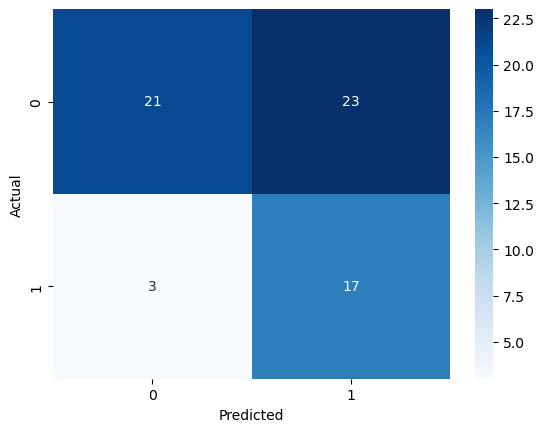

In [7]:
sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

We also train a logistic regression model with the selected $\lambda$-value but without the cost matrix.

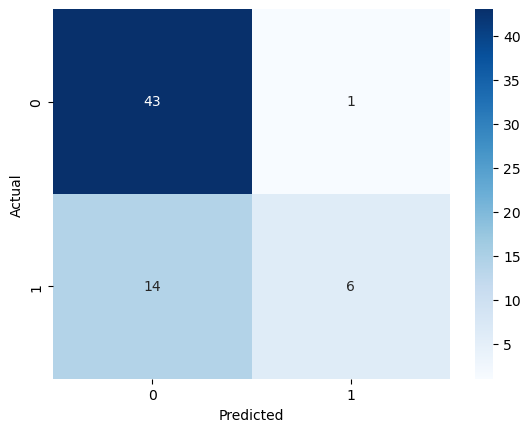

In [8]:
model2 = lm.LogisticRegression(C=1.00/lambda_value)
model2.fit(x_train_df, y_train)
y_pred2 = model2.predict(x_test_df)
conf_matrix2 = confusion_matrix(y_test, y_pred2)

sns.heatmap(conf_matrix2, annot=True, fmt='g', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()